<a href="https://colab.research.google.com/github/mthomp89/MSDS462/blob/master/Google_Cloud_VisionAPI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Install Python variant of VisionAPI and packages

In [1]:
# Install Python variant of Vision API
!pip install -q google-cloud-vision

     |████████████████████████████████| 440kB 2.8MB/s 


In [0]:
import os
from google.cloud import vision
from google.cloud.vision import types
from PIL import Image as Img, ImageDraw
from IPython.display import Image

Mount Google drive

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


Set Credentials

In [0]:
os.environ["GOOGLE_APPLICATION_CREDENTIALS"]="/content/drive/My Drive/api_keys/My First Project-86201ead3129.json"

Define functions for face detection

In [0]:
def detect_face(face_file, max_results=4):
    """Uses the Vision API to detect faces in the given file.

    Args:
        face_file: A file-like object containing an image with faces.

    Returns:
        An array of Face objects with information about the picture.
    """

    client = vision.ImageAnnotatorClient()

    content = face_file.read()
    image = types.Image(content=content)

    return client.face_detection(image=image, max_results=max_results).face_annotations

In [0]:
def highlight_faces(image, faces, output_filename):
    """Draws a polygon around the faces, then saves to output_filename.

    Args:
      image: a file containing the image with the faces.
      faces: a list of faces found in the file. This should be in the format
          returned by the Vision API.
      output_filename: the name of the image file to be created, where the
          faces have polygons drawn around them.
    """

    im = Img.open(image)
    draw = ImageDraw.Draw(im)

    # Sepecify the font-family and the font-size
    for face in faces:
        box = [(vertex.x, vertex.y) for vertex in face.bounding_poly.vertices]
        draw.line(box + [box[0]], width=10, fill="#00ff00")
        
        # Place the confidence value/score of the detected faces above the
        # detection box in the output image
        draw.text(
            (
                (face.bounding_poly.vertices)[0].x,
                (face.bounding_poly.vertices)[0].y - 30,
            ),
            str(format(face.detection_confidence, ".3f")) + "%",
            fill="#FF0000"
        )
    im.save(output_filename)

In [0]:
def call_vision_api(input_filename, output_filename, max_results):
    with open(input_filename, "rb") as image:
        faces = detect_face(image, max_results)
        print("Found {} face{}".format(len(faces), "" if len(faces) == 1 else "s"))

        print("Writing to file {}".format(output_filename))
        
        # Reset the file pointer, so we can read the file again
        image.seek(0)
        highlight_faces(image, faces, output_filename)

Call the API



Found 1 face
Writing to file /content/drive/My Drive/MSDS462/random_pics/facial_test_response_muppets.png


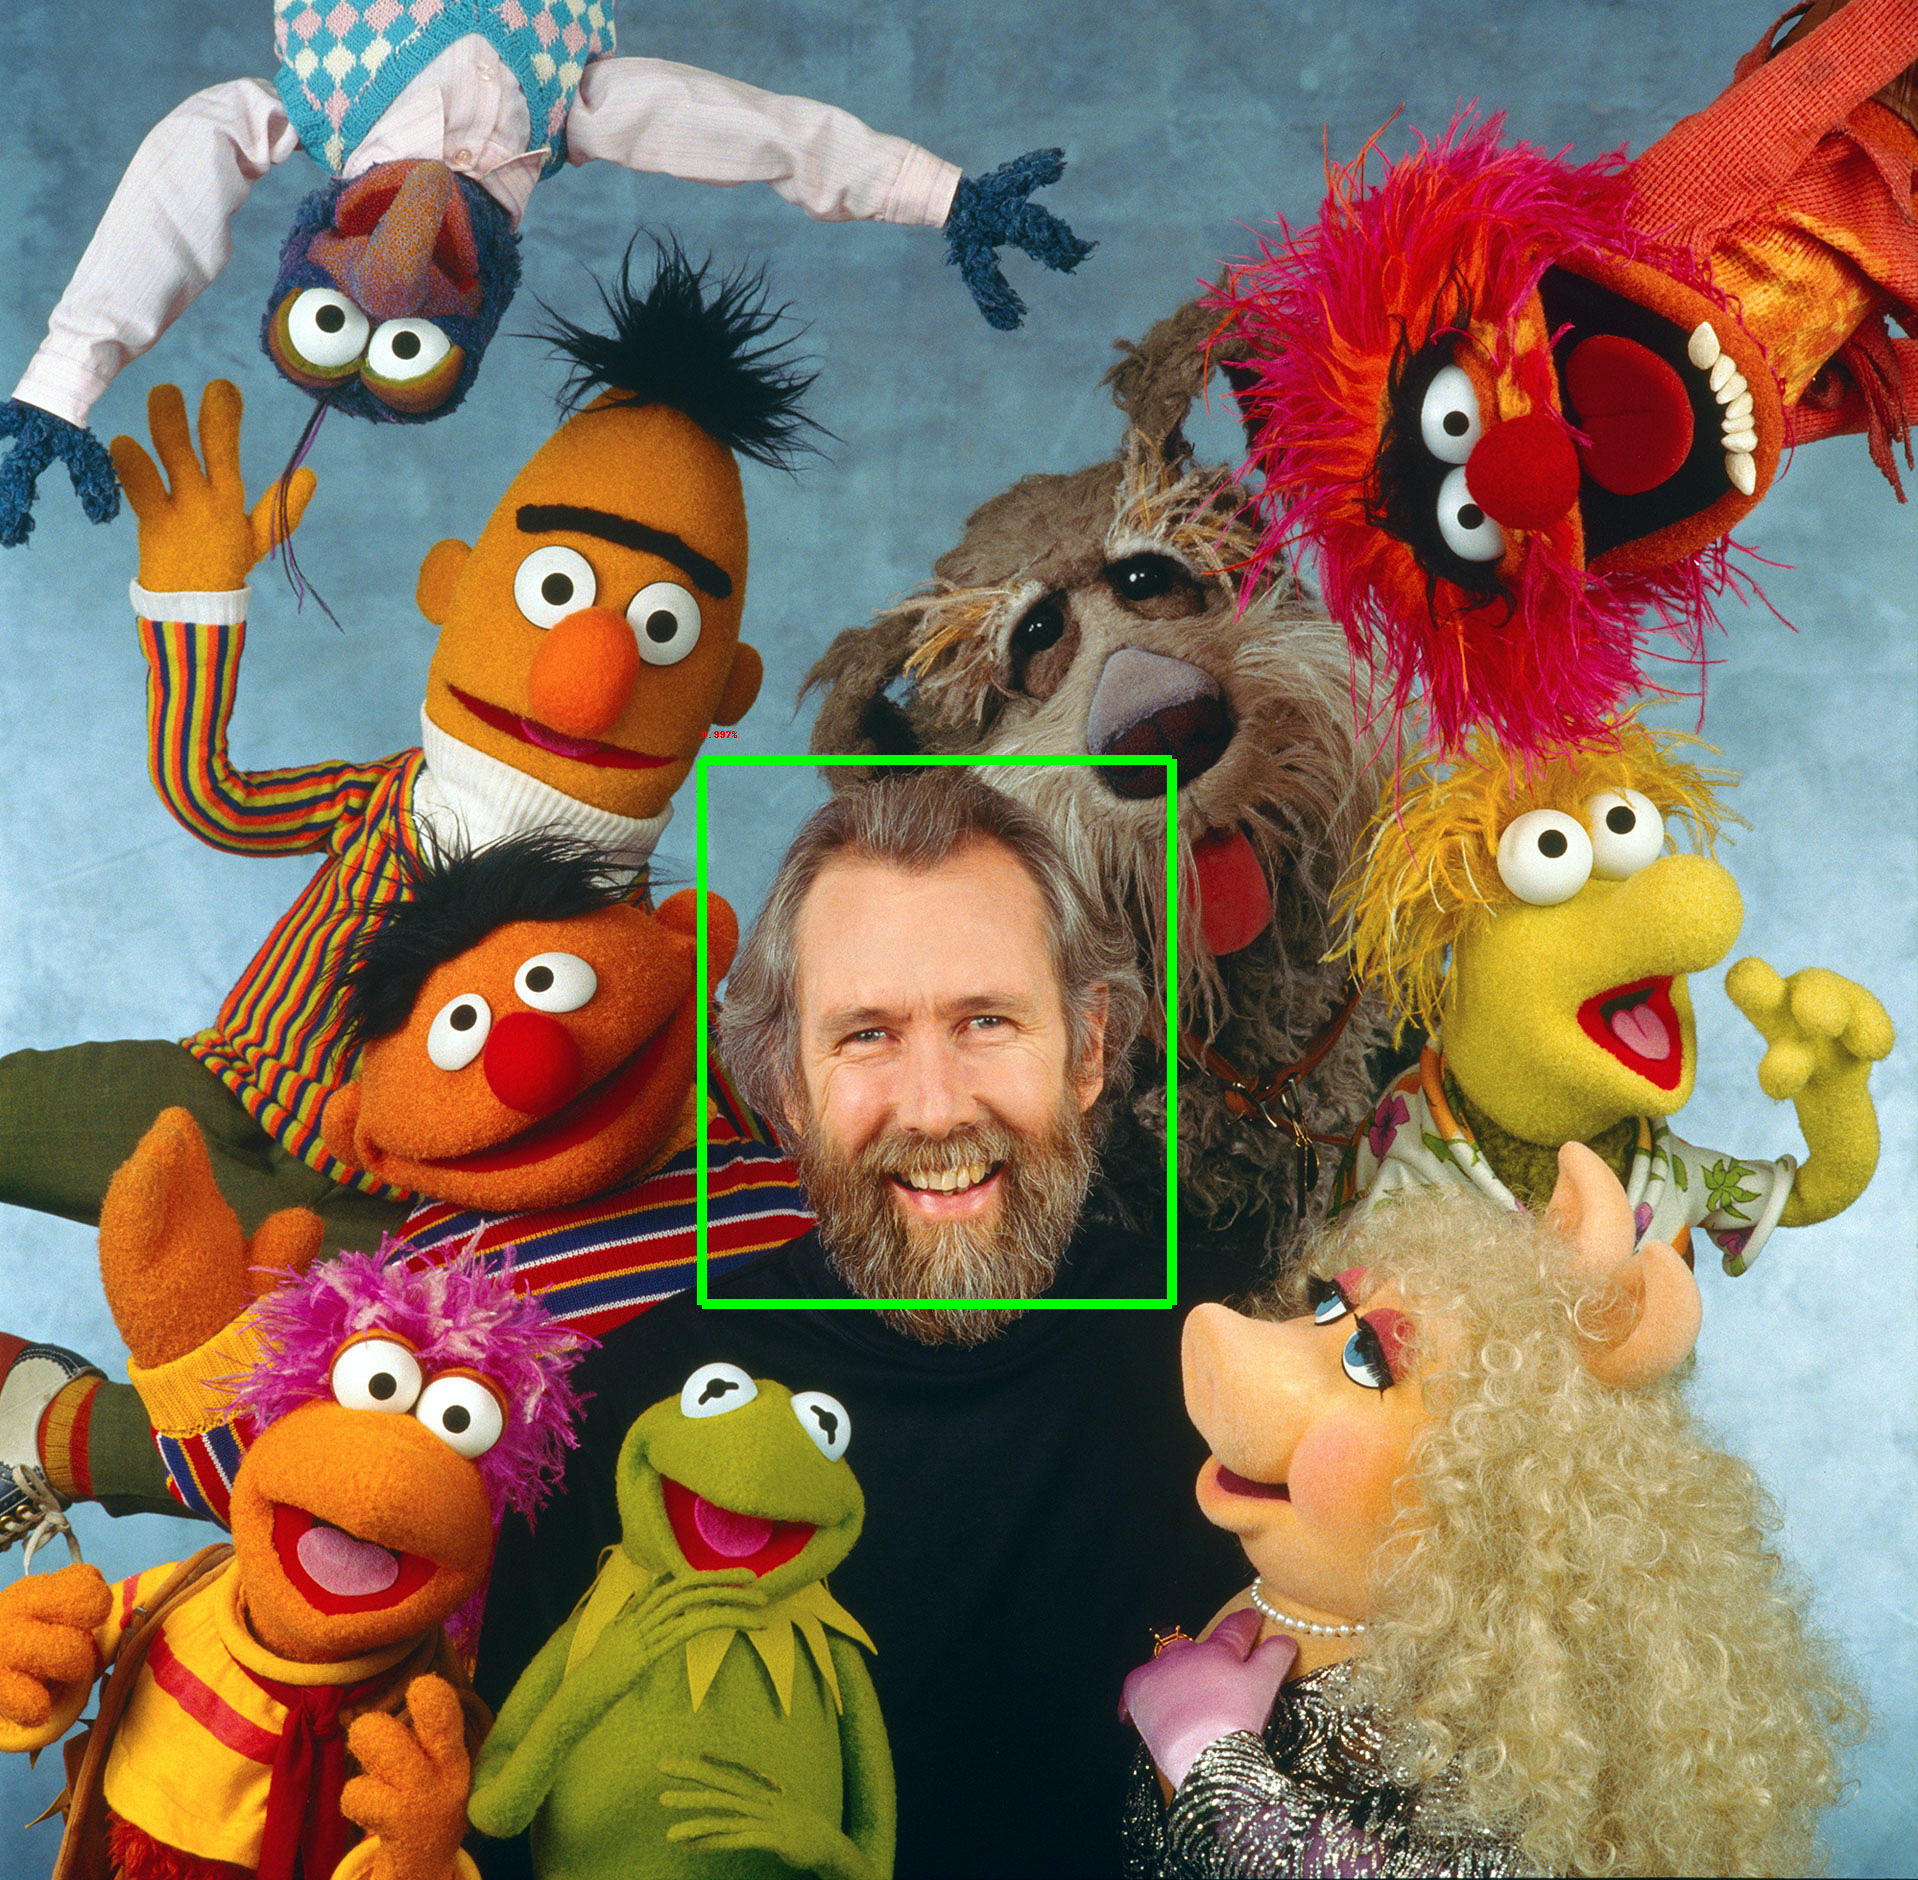

In [8]:
file_name = os.path.abspath("/content/drive/My Drive/MSDS462/random_pics/muppets.png")
output_file = "/content/drive/My Drive/MSDS462/random_pics/facial_test_response_muppets.png"
call_vision_api(input_filename=file_name, output_filename=output_file, max_results=5)

# Display output file
Image(output_file, width=500, height=500)